读取文件的内容转化成数组的形式

In [1]:
import numpy as np

def file2matrix(filename,length=2):
    fr=open(filename)
    lines=fr.readlines()
    numberoflines=len(lines)
    returnmat=np.zeros((numberoflines,length))
    index=0
    for line in lines:
        line=line.strip()
        listofline=line.split('   ')
        # print(listofline)
        returnmat[index,:]=listofline
        index=index+1
    return returnmat
 
if __name__=="__main__":
    print(file2matrix('./ex4x.dat'))
    print(file2matrix('./ex4y.dat',1)) 

[[55.5 69.5]
 [41.  81.5]
 [53.5 86. ]
 [46.  84. ]
 [41.  73.5]
 [51.5 69. ]
 [51.  62.5]
 [42.  75. ]
 [53.5 83. ]
 [57.5 71. ]
 [42.5 72.5]
 [41.  80. ]
 [46.  82. ]
 [46.  60.5]
 [49.5 76. ]
 [41.  76. ]
 [48.5 72.5]
 [51.5 82.5]
 [44.5 70.5]
 [44.  66. ]
 [33.  76.5]
 [33.5 78.5]
 [31.5 72. ]
 [33.  81.5]
 [42.  59.5]
 [30.  64. ]
 [61.  45. ]
 [49.  79. ]
 [26.5 64.5]
 [34.  71.5]
 [42.  83.5]
 [29.5 74.5]
 [39.5 70. ]
 [51.5 66. ]
 [41.5 71.5]
 [42.5 79.5]
 [35.  59.5]
 [38.5 73.5]
 [32.  81.5]
 [46.  60.5]
 [36.5 53. ]
 [36.5 53.5]
 [24.  60.5]
 [19.  57.5]
 [34.5 60. ]
 [37.5 64.5]
 [35.5 51. ]
 [37.  50.5]
 [21.5 42. ]
 [35.5 58.5]
 [26.5 68.5]
 [26.5 55.5]
 [18.5 67. ]
 [40.  67. ]
 [32.5 71.5]
 [39.  71.5]
 [43.  55.5]
 [22.  54. ]
 [36.  62.5]
 [31.  55.5]
 [38.5 76. ]
 [40.  75. ]
 [37.5 63. ]
 [24.5 58. ]
 [30.  67. ]
 [33.  56. ]
 [56.5 61. ]
 [41.  57. ]
 [49.5 63. ]
 [34.5 72.5]
 [32.5 69. ]
 [36.  73. ]
 [27.  53.5]
 [41.  63.5]
 [29.5 52.5]
 [20.  65.5]
 [38.  65. ]

数据归一化

In [2]:
import numpy as np
 
def normalizefeature(x):
    x_norm=x
    mu=np.mean(x,axis=0)
    sigma=np.std(x,axis=0)
    x_norm=(x-mu)/sigma
    # for i in range(x.shape[1]):
    #     x_norm[:,i]=(x[:,i]-mu)/sigma
    return x_norm,mu,sigma
 
if __name__=="__main__":
    returnmat=file2matrix("./ex4x.dat")
    x_norm,mu,sigma=normalizefeature(returnmat)
    print(x_norm.shape)

(80, 2)


数据的可视化

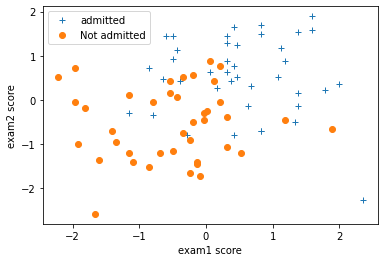

In [3]:
import matplotlib.pyplot as plt
import numpy as np
 
def plot_data(*agrs):
    # 这里很显然将数据文件的数据转化成矩阵的形式
    X = file2matrix('./ex4x.dat')
    # print(X.shape)#(80,2)
    y = file2matrix('./ex4y.dat', 1)
    # print(y.shape)#(80,1)
 
    X,_,_=normalizefeature(X)
    pos = list(np.where(y == 1.0)[0])
    X_pos = X[pos]
    neg = list(np.where(y == 0.0)[0])
    X_neg = X[neg]
    plt.plot(X_pos[:,0],X_pos[:,1],'+',label='admitted')
    plt.plot(X_neg[:,0],X_neg[:,1],'o',label='Not admitted')
    plt.xlabel("exam1 score")
    plt.ylabel("exam2 score")
    plt.legend()
    plt.show()
 
 
if __name__=="__main__":
    plot_data()

假设函数为Sigmoid函数

In [4]:
import numpy as np
 
def sigmoid(z):
    res=1/(1+np.exp(-z))
    return res

计算代价的文件

In [5]:
import numpy as np
 
def compute_loss(x,y,theta):
    # h=sigmoid(np.dot(x,theta))
    # loss=-1/x.shape[0]*(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))
    loss=-np.sum((np.dot(y.T,np.log(sigmoid(np.dot(x,theta))))
           +np.dot((1-y).T,np.log(1-sigmoid(np.dot(x,theta)))))/x.shape[0])
    return loss
 
if __name__=='__main__':
    x=np.array([[1,2],[2,3],[3,4]])
    y=np.array([1,0,1])
    theta=np.array([[1],[1]])
    print(compute_loss(x,y,theta))

1.6854047221722175


牛顿法进行参数的更新

[[1 0]
 [0 2]]
theta [[-16.37873983]
 [  0.14834074]
 [  0.15890842]]
J [0.6931471805599452, 0.4409414251174157, 0.40889169253305635, 0.4055107760590174, 0.40544745391660414]


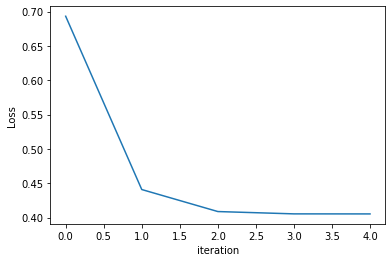

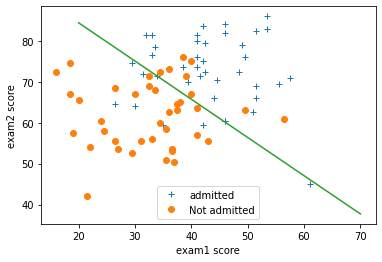

In [6]:
import numpy as np
import matplotlib.pyplot as plt
 
a=np.diag(np.array([1,2]))
print(a)
 
def nt(x,y,theta,iterations):
    n,m=x.shape
    J_loss=[]
    orig_loss=np.inf
    for i in range(iterations):
        l=compute_loss(x,y,theta)
        J_loss.append(l)
        h=sigmoid(np.dot(x,theta))#(n,1)
        # print("h-shape",h.shape)
        j_first_order=1/n*np.dot(x.T,h-y)#(m,1)
        j_second_order=1/n*np.dot(np.dot(np.dot(x.T,np.diag(h.reshape(n))),np.diag(1-h.reshape(n))),x)#(m,m)
        theta=theta-np.dot(np.linalg.inv(j_second_order),j_first_order)#(m,1)
        # print("theta-shape",theta.shape)
    return theta,J_loss
 
if __name__=="__main__":
    X = file2matrix('./ex4x.dat')
    # print(X.shape)#(80,2)
    # returnmat = X
    y = file2matrix('./ex4y.dat', 1)
    # print(y.shape)#(80,1)
 
    n, m = X.shape
    X = np.column_stack((np.ones(n), X))
    # print(X.shape)
    m = m + 1
    theta = np.zeros((m, 1))
 
    theta, J_his = nt(X, y, theta, 5)
 
    print("theta", theta)
    print("J", J_his)
    plt.xlabel("iteration")
    plt.ylabel("Loss")
    plt.plot(np.arange(5), J_his)
    plt.show()
 
    pos = list(np.where(y == 1.0)[0])
    X_pos = X[pos,1:3]
    neg = list(np.where(y == 0.0)[0])
    X_neg = X[neg,1:3]
    plt.plot(X_pos[:, 0], X_pos[:, 1], '+', label='admitted')
    plt.plot(X_neg[:, 0], X_neg[:, 1], 'o', label='Not admitted')
    plt.xlabel("exam1 score")
    plt.ylabel("exam2 score")
    plt.legend()
 
    xx = np.linspace(20, 70, 6)
    yy = []
    for i in xx:
        res = (i * -(theta[1][0]) - (theta[0][0])) / (theta[2][0])
        yy.append(res)
    plt.plot(xx, yy)
    plt.show()